# Building a Chatbot from Scratch (using NLTK) ANN

# import the required packages

In [1]:
import json 
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

# load the json file - JavaScript Object Notation

# Split data into training samples and their Corresponding Labels

In [2]:
with open('intents_1.json') as file:
    data = json.load(file)
    
training_sentences = []
training_labels = []
labels = []
responses = []


for intent in data['intents']:
    for pattern in intent['patterns']:
        training_sentences.append(pattern)
        training_labels.append(intent['tag'])
    responses.append(intent['responses'])
    
    if intent['tag'] not in labels:
        labels.append(intent['tag'])
        
num_classes = len(labels)

In [3]:
training_sentences,training_labels,labels,responses

(['Hi',
  'Hey',
  'Is anyone there?',
  'Hello',
  'Hay',
  'Bye',
  'See you later',
  'Goodbye',
  'Thanks',
  'Thank you',
  "That's helpful",
  'Thanks for the help',
  'Who are you?',
  'What are you?',
  'Who you are?',
  'what is your name',
  'what should I call you',
  'whats your name?',
  'Could you help me?',
  'give me a hand please',
  'Can you help?',
  'What can you do for me?',
  'I need a support',
  'I need a help',
  'support me please',
  'I need to create a new account',
  'how to open a new account',
  'I want to create an account',
  'can you create an account for me',
  'how to open a new account',
  'have a complaint',
  'I want to raise a complaint',
  'there is a complaint about a service'],
 ['greeting',
  'greeting',
  'greeting',
  'greeting',
  'greeting',
  'goodbye',
  'goodbye',
  'goodbye',
  'thanks',
  'thanks',
  'thanks',
  'thanks',
  'about',
  'about',
  'about',
  'name',
  'name',
  'name',
  'help',
  'help',
  'help',
  'help',
  'help',


In [4]:
num_classes
labels
len(training_sentences)
#training_labels.shape
training_sentences

['Hi',
 'Hey',
 'Is anyone there?',
 'Hello',
 'Hay',
 'Bye',
 'See you later',
 'Goodbye',
 'Thanks',
 'Thank you',
 "That's helpful",
 'Thanks for the help',
 'Who are you?',
 'What are you?',
 'Who you are?',
 'what is your name',
 'what should I call you',
 'whats your name?',
 'Could you help me?',
 'give me a hand please',
 'Can you help?',
 'What can you do for me?',
 'I need a support',
 'I need a help',
 'support me please',
 'I need to create a new account',
 'how to open a new account',
 'I want to create an account',
 'can you create an account for me',
 'how to open a new account',
 'have a complaint',
 'I want to raise a complaint',
 'there is a complaint about a service']

# Data Encoding -- Preprocessing Data

In [5]:
lbl_encoder = LabelEncoder()
lbl_encoder.fit(training_labels)
training_labels = lbl_encoder.transform(training_labels)

In [6]:
training_labels

array([4, 4, 4, 4, 4, 3, 3, 3, 7, 7, 7, 7, 0, 0, 0, 6, 6, 6, 5, 5, 5, 5,
       5, 5, 5, 2, 2, 2, 2, 2, 1, 1, 1])

# Vectorize text data corpus by using the “Tokenizer” class 

In [7]:
vocab_size = 1000
embedding_dim = 16
max_len = 20
oov_token = "<OOV>"
# “oov_token” which is a value for “out of token” 
#to deal with out of vocabulary words(tokens) at inference time.

In [8]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)

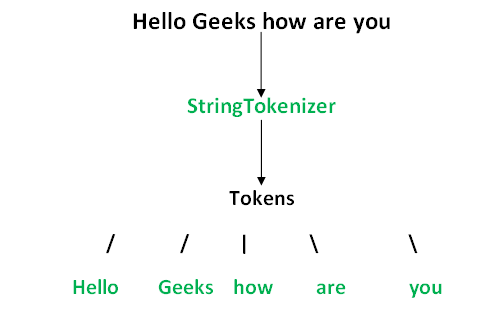

In [9]:
tokenizer.fit_on_texts(training_sentences)

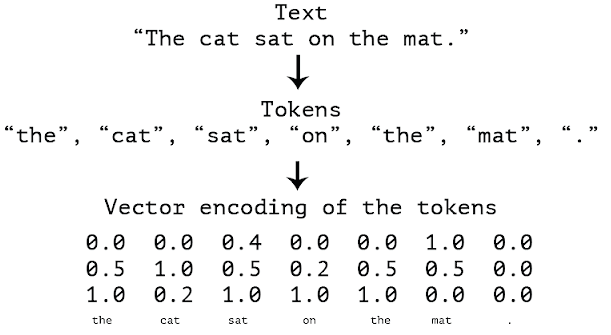

In [10]:
word_index = tokenizer.word_index
word_index

{'<OOV>': 1,
 'you': 2,
 'a': 3,
 'i': 4,
 'me': 5,
 'to': 6,
 'account': 7,
 'help': 8,
 'what': 9,
 'is': 10,
 'for': 11,
 'are': 12,
 'can': 13,
 'need': 14,
 'create': 15,
 'new': 16,
 'complaint': 17,
 'there': 18,
 'thanks': 19,
 'who': 20,
 'your': 21,
 'name': 22,
 'please': 23,
 'support': 24,
 'how': 25,
 'open': 26,
 'want': 27,
 'an': 28,
 'hi': 29,
 'hey': 30,
 'anyone': 31,
 'hello': 32,
 'hay': 33,
 'bye': 34,
 'see': 35,
 'later': 36,
 'goodbye': 37,
 'thank': 38,
 "that's": 39,
 'helpful': 40,
 'the': 41,
 'should': 42,
 'call': 43,
 'whats': 44,
 'could': 45,
 'give': 46,
 'hand': 47,
 'do': 48,
 'have': 49,
 'raise': 50,
 'about': 51,
 'service': 52}

In [15]:
sequences = tokenizer.texts_to_sequences(training_sentences)

In [16]:
sequences

[[29],
 [30],
 [10, 31, 18],
 [32],
 [33],
 [34],
 [35, 2, 36],
 [37],
 [19],
 [38, 2],
 [39, 40],
 [19, 11, 41, 8],
 [20, 12, 2],
 [9, 12, 2],
 [20, 2, 12],
 [9, 10, 21, 22],
 [9, 42, 4, 43, 2],
 [44, 21, 22],
 [45, 2, 8, 5],
 [46, 5, 3, 47, 23],
 [13, 2, 8],
 [9, 13, 2, 48, 11, 5],
 [4, 14, 3, 24],
 [4, 14, 3, 8],
 [24, 5, 23],
 [4, 14, 6, 15, 3, 16, 7],
 [25, 6, 26, 3, 16, 7],
 [4, 27, 6, 15, 28, 7],
 [13, 2, 15, 28, 7, 11, 5],
 [25, 6, 26, 3, 16, 7],
 [49, 3, 17],
 [4, 27, 6, 50, 3, 17],
 [18, 10, 3, 17, 51, 3, 52]]

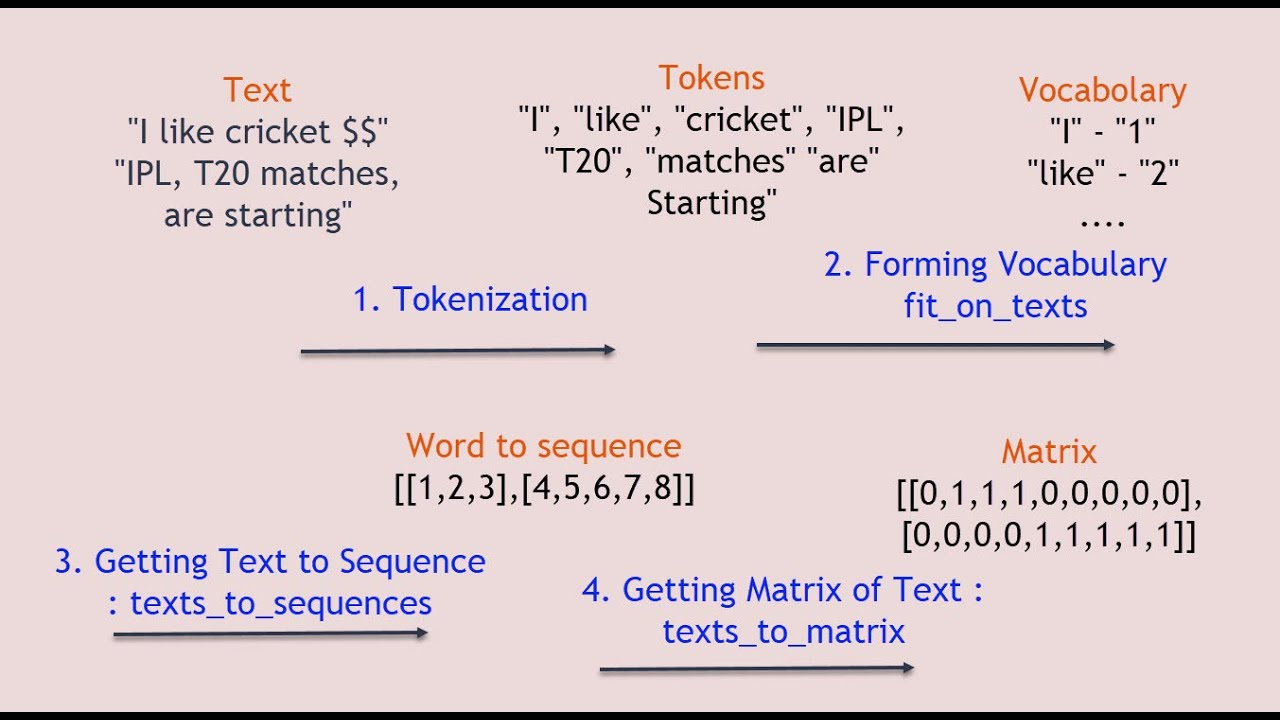

# Make Equal Size Training Sequences

In [17]:
padded_sequences = pad_sequences(sequences, truncating='post', maxlen=max_len)

In [18]:
padded_sequences

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0, 29],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0, 30],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0, 10, 31, 18],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0, 32],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0, 33],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0, 34],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0, 35,  2, 36],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0, 37],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0, 19],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0, 38,  2],
       [ 0,  0,  0,  0,  0,  0

# Build a ANN model

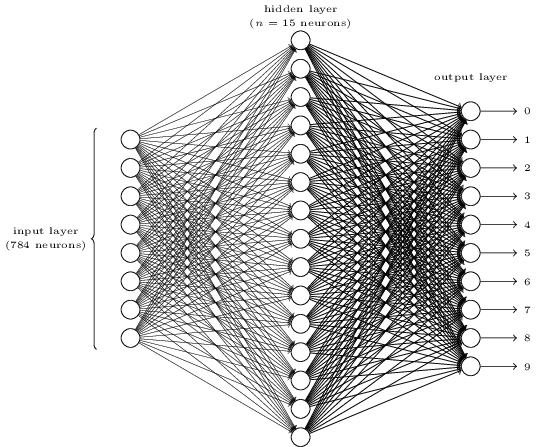

In [19]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 16)            16000     
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
Total params: 16,680
Trainable params: 16,680
Non-trainable params: 0
_________________________________________________________________


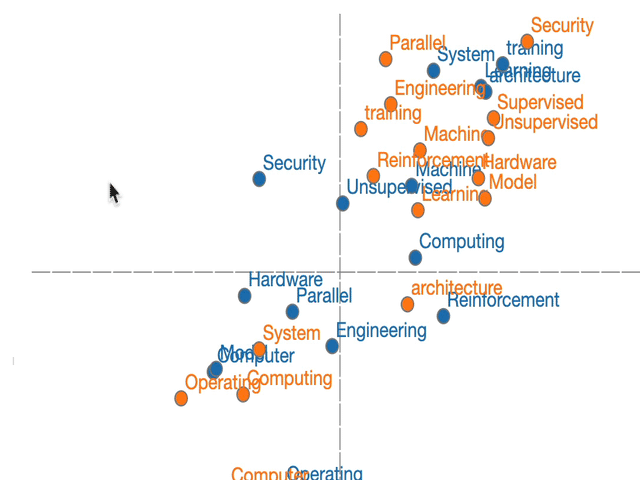

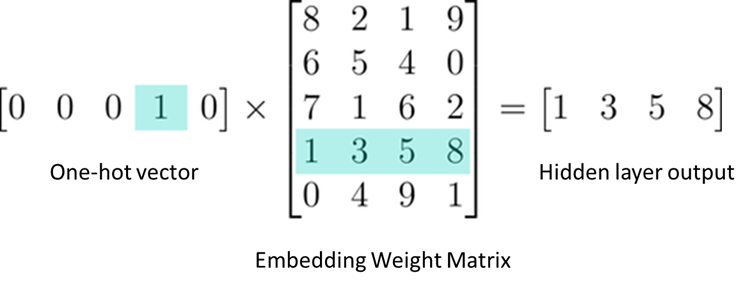

http://projector.tensorflow.org/

In [20]:
epochs = 500
history = model.fit(padded_sequences, np.array(training_labels), epochs=epochs,verbose=1)

Epoch 1/500
2/2 [==============================] - 4s 36ms/step - loss: 2.0796 - accuracy: 0.0909
Epoch 2/500
2/2 [==============================] - 0s 26ms/step - loss: 2.0786 - accuracy: 0.1515
Epoch 3/500
2/2 [==============================] - 0s 24ms/step - loss: 2.0786 - accuracy: 0.3030
Epoch 4/500
2/2 [==============================] - 0s 19ms/step - loss: 2.0784 - accuracy: 0.2424
Epoch 5/500
2/2 [==============================] - 0s 19ms/step - loss: 2.0782 - accuracy: 0.2121
Epoch 6/500
2/2 [==============================] - 0s 12ms/step - loss: 2.0779 - accuracy: 0.2121
Epoch 7/500
2/2 [==============================] - 0s 12ms/step - loss: 2.0776 - accuracy: 0.2121
Epoch 8/500
2/2 [==============================] - 0s 12ms/step - loss: 2.0773 - accuracy: 0.2121
Epoch 9/500
2/2 [==============================] - 0s 11ms/step - loss: 2.0770 - accuracy: 0.2121
Epoch 10/500
2/2 [==============================] - 0s 12ms/step - loss: 2.0767 - accuracy: 0.2121
Epoch 11/500
2/2 [=

2/2 [==============================] - 0s 9ms/step - loss: 2.0311 - accuracy: 0.3636
Epoch 85/500
2/2 [==============================] - 0s 9ms/step - loss: 2.0298 - accuracy: 0.3636
Epoch 86/500
2/2 [==============================] - 0s 9ms/step - loss: 2.0281 - accuracy: 0.3636
Epoch 87/500
2/2 [==============================] - 0s 9ms/step - loss: 2.0262 - accuracy: 0.3636
Epoch 88/500
2/2 [==============================] - 0s 7ms/step - loss: 2.0241 - accuracy: 0.3636
Epoch 89/500
2/2 [==============================] - 0s 8ms/step - loss: 2.0221 - accuracy: 0.3636
Epoch 90/500
2/2 [==============================] - 0s 8ms/step - loss: 2.0202 - accuracy: 0.3636
Epoch 91/500
2/2 [==============================] - 0s 9ms/step - loss: 2.0185 - accuracy: 0.3636
Epoch 92/500
2/2 [==============================] - 0s 10ms/step - loss: 2.0169 - accuracy: 0.3636
Epoch 93/500
2/2 [==============================] - 0s 9ms/step - loss: 2.0154 - accuracy: 0.3636
Epoch 94/500
2/2 [==============

Epoch 167/500
2/2 [==============================] - 0s 7ms/step - loss: 1.8050 - accuracy: 0.4848
Epoch 168/500
2/2 [==============================] - 0s 8ms/step - loss: 1.8003 - accuracy: 0.4545
Epoch 169/500
2/2 [==============================] - 0s 9ms/step - loss: 1.7964 - accuracy: 0.4545
Epoch 170/500
2/2 [==============================] - 0s 8ms/step - loss: 1.7916 - accuracy: 0.4545
Epoch 171/500
2/2 [==============================] - 0s 8ms/step - loss: 1.7875 - accuracy: 0.4848
Epoch 172/500
2/2 [==============================] - 0s 8ms/step - loss: 1.7833 - accuracy: 0.4242
Epoch 173/500
2/2 [==============================] - 0s 8ms/step - loss: 1.7795 - accuracy: 0.4242
Epoch 174/500
2/2 [==============================] - 0s 9ms/step - loss: 1.7768 - accuracy: 0.3939
Epoch 175/500
2/2 [==============================] - 0s 9ms/step - loss: 1.7738 - accuracy: 0.3939
Epoch 176/500
2/2 [==============================] - 0s 7ms/step - loss: 1.7705 - accuracy: 0.3939
Epoch 177/

2/2 [==============================] - 0s 9ms/step - loss: 1.4090 - accuracy: 0.4848
Epoch 250/500
2/2 [==============================] - 0s 8ms/step - loss: 1.4038 - accuracy: 0.4848
Epoch 251/500
2/2 [==============================] - 0s 8ms/step - loss: 1.4009 - accuracy: 0.4848
Epoch 252/500
2/2 [==============================] - 0s 10ms/step - loss: 1.3972 - accuracy: 0.4848
Epoch 253/500
2/2 [==============================] - 0s 8ms/step - loss: 1.3941 - accuracy: 0.4848
Epoch 254/500
2/2 [==============================] - 0s 8ms/step - loss: 1.3905 - accuracy: 0.4848
Epoch 255/500
2/2 [==============================] - 0s 9ms/step - loss: 1.3845 - accuracy: 0.4848
Epoch 256/500
2/2 [==============================] - 0s 10ms/step - loss: 1.3783 - accuracy: 0.4848
Epoch 257/500
2/2 [==============================] - 0s 8ms/step - loss: 1.3714 - accuracy: 0.4848
Epoch 258/500
2/2 [==============================] - 0s 8ms/step - loss: 1.3654 - accuracy: 0.4848
Epoch 259/500
2/2 [===

2/2 [==============================] - 0s 9ms/step - loss: 1.0576 - accuracy: 0.6970
Epoch 332/500
2/2 [==============================] - 0s 9ms/step - loss: 1.0543 - accuracy: 0.6970
Epoch 333/500
2/2 [==============================] - 0s 8ms/step - loss: 1.0512 - accuracy: 0.6970
Epoch 334/500
2/2 [==============================] - 0s 8ms/step - loss: 1.0503 - accuracy: 0.6970
Epoch 335/500
2/2 [==============================] - 0s 11ms/step - loss: 1.0496 - accuracy: 0.6970
Epoch 336/500
2/2 [==============================] - 0s 12ms/step - loss: 1.0455 - accuracy: 0.6970
Epoch 337/500
2/2 [==============================] - 0s 11ms/step - loss: 1.0402 - accuracy: 0.6970
Epoch 338/500
2/2 [==============================] - 0s 10ms/step - loss: 1.0347 - accuracy: 0.6970
Epoch 339/500
2/2 [==============================] - 0s 12ms/step - loss: 1.0294 - accuracy: 0.6970
Epoch 340/500
2/2 [==============================] - 0s 11ms/step - loss: 1.0249 - accuracy: 0.6970
Epoch 341/500
2/2 

2/2 [==============================] - 0s 8ms/step - loss: 0.8211 - accuracy: 0.7879
Epoch 414/500
2/2 [==============================] - 0s 8ms/step - loss: 0.8188 - accuracy: 0.7879
Epoch 415/500
2/2 [==============================] - 0s 8ms/step - loss: 0.8186 - accuracy: 0.7879
Epoch 416/500
2/2 [==============================] - 0s 9ms/step - loss: 0.8183 - accuracy: 0.7879
Epoch 417/500
2/2 [==============================] - 0s 8ms/step - loss: 0.8176 - accuracy: 0.7879
Epoch 418/500
2/2 [==============================] - 0s 9ms/step - loss: 0.8158 - accuracy: 0.7879
Epoch 419/500
2/2 [==============================] - 0s 9ms/step - loss: 0.8139 - accuracy: 0.7879
Epoch 420/500
2/2 [==============================] - 0s 8ms/step - loss: 0.8104 - accuracy: 0.7879
Epoch 421/500
2/2 [==============================] - 0s 9ms/step - loss: 0.8055 - accuracy: 0.7879
Epoch 422/500
2/2 [==============================] - 0s 9ms/step - loss: 0.8006 - accuracy: 0.7879
Epoch 423/500
2/2 [=====

2/2 [==============================] - 0s 8ms/step - loss: 0.6360 - accuracy: 0.8485
Epoch 496/500
2/2 [==============================] - 0s 8ms/step - loss: 0.6338 - accuracy: 0.8485
Epoch 497/500
2/2 [==============================] - 0s 8ms/step - loss: 0.6321 - accuracy: 0.8485
Epoch 498/500
2/2 [==============================] - 0s 9ms/step - loss: 0.6309 - accuracy: 0.8485
Epoch 499/500
2/2 [==============================] - 0s 8ms/step - loss: 0.6296 - accuracy: 0.8485
Epoch 500/500
2/2 [==============================] - 0s 8ms/step - loss: 0.6278 - accuracy: 0.8485


# Save all the required files in order to use it at the inference time

# 1. save the trained model


In [21]:
model.save("chatbot_ANN_model")

INFO:tensorflow:Assets written to: chatbot_ANN_model\assets


# 2. save the fitted tokenizer

In [22]:
import pickle

Python pickle module is used for serializing and de-serializing a Python object structure. Any object in Python can be pickled so that it can be saved on disk. What pickle does is that it “serializes” the object first before writing it to file. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.

In [23]:
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Save the fitted label encoder

In [24]:
with open('label_encoder.pickle', 'wb') as ecn_file:
    pickle.dump(lbl_encoder, ecn_file, protocol=pickle.HIGHEST_PROTOCOL)

# Finally Testing or Inference

When a new user message is received, the chatbot will calculate the similarity between the new inputted text sequence and training data. Considering the confidence scores got for each category, it categorizes the user message to an intent or class with the highest confidence score.

In [25]:
#import json 
#import numpy as np
#from tensorflow import keras
#from sklearn.preprocessing import LabelEncoder
import colorama 
colorama.init()
from colorama import Fore, Style, Back

import random
import pickle

In [ ]:
def chat():
    # load trained model
    model = keras.models.load_model('chatbot_ANN_model')

    # load tokenizer object
    with open('tokenizer.pickle', 'rb') as handle:     # rb - read binary
        tokenizer = pickle.load(handle)

    # load label encoder object
    with open('label_encoder.pickle', 'rb') as enc:
        lbl_encoder = pickle.load(enc)

    # parameters
    max_len = 20
    
    while True:
        print(Fore.LIGHTBLUE_EX + "User: " + Style.RESET_ALL, end="")
        inp = input()
        if inp.lower() == "quit":
            break

        result = model.predict(keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences([inp]),
                                             truncating='post', maxlen=max_len))
        tag = lbl_encoder.inverse_transform([np.argmax(result)])
         
        for i in data['intents']:
            if i['tag'] == tag:
                print(Fore.GREEN + "ChatBot:" + Style.RESET_ALL , np.random.choice(i['responses']))

        # print(Fore.GREEN + "ChatBot:" + Style.RESET_ALL,random.choice(responses))

print(Fore.YELLOW + "Start messaging with the bot (type quit to stop)!" + Style.RESET_ALL)
chat()

Start messaging with the bot (type quit to stop)!
User: hi
ChatBot: Hello
User: hai
ChatBot: Have a nice day
User: how are you
ChatBot: I'm Joana, an Artificial Intelligent bot
User: thanks
ChatBot: Happy to help!
User: thank you
ChatBot: My pleasure
User: thank
ChatBot: You're most welcome!
User: help me
ChatBot: Hi there
User: could you help me
ChatBot: Tell me how can assist you
User: have a complaint
ChatBot: Yes Sure, How can I support you
User: 